In [368]:
from scipy.integrate import simps as simpson

In [369]:
from calc_ext import *

In [370]:
model = OpacityModel() 

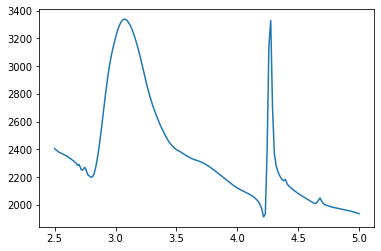

In [371]:
# plot total extinction vs. wavelength
model.plot_cext()

# run_opac_grid

In [372]:
from run_opac_grid import *

all_pars is a list of ranges of all four variables. master_iter_withid iterates through these ranges from the right-most variable to the left, to create one master list. (10)(10)(1)(30) = 3000 combinations

all_pars = [amins,amaxs,alphas,ice_thicks]

In [373]:
all_pars

[array([0.01]),
 array([ 0.011     ,  0.01391277,  0.01759684,  0.02225643,  0.02814987,
         0.03560389,  0.0450317 ,  0.05695597,  0.07203776,  0.09111317,
         0.1152397 ,  0.14575486,  0.18435036,  0.23316584,  0.29490754,
         0.37299827,  0.47176721,  0.59668991,  0.75469181,  0.95453219,
         1.20728978,  1.52697689,  1.9313163 ,  2.44272371,  3.08955044,
         3.90765517,  4.94239184,  6.25112403,  7.90640502, 10.        ]),
 array([-2.5       , -2.61111111, -2.72222222, -2.83333333, -2.94444444,
        -3.05555556, -3.16666667, -3.27777778, -3.38888889, -3.5       ]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])]

In [374]:
master_iter_withid[:11]

[{'pars': (0.01, 0.010999999999999998, -2.5, 0.1), 'id': 0},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.2), 'id': 1},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.30000000000000004), 'id': 2},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.4), 'id': 3},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.5), 'id': 4},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.6), 'id': 5},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.7000000000000001), 'id': 6},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.8), 'id': 7},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.9), 'id': 8},
 {'pars': (0.01, 0.010999999999999998, -2.5, 1.0), 'id': 9},
 {'pars': (0.01, 0.010999999999999998, -2.611111111111111, 0.1), 'id': 10}]

In [375]:
# check that there are 3000 combinations
master_iter_withid[-1]

{'pars': (0.01, 10.0, -3.5, 1.0), 'id': 2999}

In [376]:
# find id of given opacity file       
amax_ind = 0       #range(0,30)
alpha_ind = 0      #range(0,10) 
icethick_ind = 0   #range(0,10) 
id_ = (amax_ind*100)+(alpha_ind*10)+icethick_ind

for each element of the list, run Opacity Model on the four input parameters

{'pars': (0.01, 0.010999999999999998, -2.5, 0.1), 'id': 0}


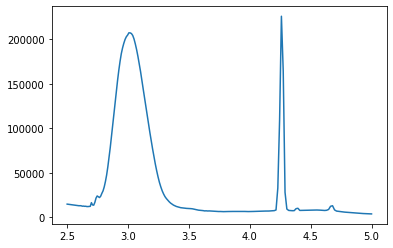

In [377]:
pars_and_id = master_iter_withid[0]
print(pars_and_id) #print input parameters
pars = pars_and_id['pars']
model = OpacityModel(amin=pars[0],amax=pars[1],alpha=pars[2],ice_thick=pars[3],outname="none")
model.plot_cext() #plot extinction vs. wavelength

write to file with write_opac() from calc_ext.py

columns:
- wavelength
- cext, total extinction
- csca, total scattering
- g, assymetry parameter


read files using fits.getdata()

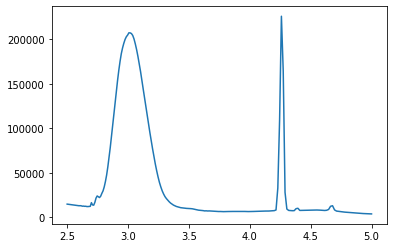

In [378]:
# check that reading data creates the same graph
id_=0
data_raw = fits.getdata('opacities/opacity_'+str(id_)+'.fits')
plt.plot(data_raw['wavelength'], data_raw['cext'])

In [379]:
# create sublist
# vary amax while keeping the other parameters fixed
def vary_amax(alpha_ind=0,ice_thick_ind=0): #input fixed alpha/ice thickness
    pars=[]
    ids = []
    for x in np.arange(0,3000,100):
        id_ = x+(alpha_ind*10)+ice_thick_ind
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids

pars,ids = vary_amax()

(amin, amax, alpha, ice thickness)
(0.01, 0.010999999999999998, -2.5, 0.1)
(0.01, 0.09111317112210193, -2.5, 0.1)
(0.01, 0.9545321949630716, -2.5, 0.1)
(0.01, 10.0, -2.5, 0.1)


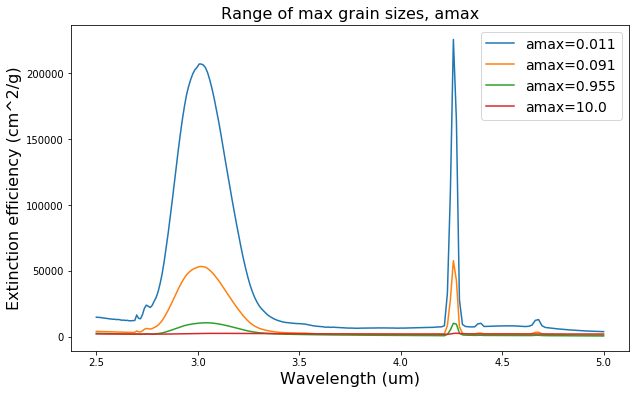

In [380]:
# graph a range of max grain sizes

# choose alpha and ice thickness to fix
# alpha[0] = -2.5
# ice thickness[0] = 0.1
pars,ids = vary_amax(0,0)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)

print("(amin, amax, alpha, ice thickness)")
for i in np.linspace(0,len(ids)-1,4,dtype=int):
    print(pars[i]["pars"])
    data_raw = fits.getdata('opacities/opacity_'+str(ids[i])+'.fits')
    ax1.plot(data_raw['wavelength'], data_raw['cext'],label="amax="+str(round(pars[i]["pars"][1],3)))

ax1.set_title("Range of max grain sizes, amax",fontsize=16)
ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Extinction efficiency (cm^2/g)",fontsize=16)
ax1.legend(fontsize=14)

In [381]:
# vary alpha while keeping the other parameters fixed
def vary_alpha(amax_ind=0,ice_thick_ind=0): #input fixed amax/ice thickness
    pars=[]
    ids = []
    for x in np.arange(0,10,1):
        id_ = (amax_ind*100)+10*x+ice_thick_ind
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids

pars,ids = vary_alpha()

(amin, amax, alpha, ice thickness)
(0.01, 0.010999999999999998, -2.5, 0.1)
(0.01, 0.010999999999999998, -2.8333333333333335, 0.1)
(0.01, 0.010999999999999998, -3.1666666666666665, 0.1)
(0.01, 0.010999999999999998, -3.5, 0.1)


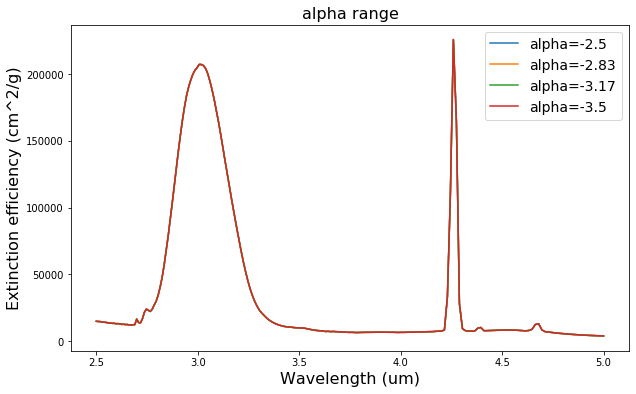

In [382]:
# graph alpha range

# choose amax and ice thickness to fix
# amax[0] = 0.011
# ice thickness[0] = 0.1
pars,ids = vary_alpha(0,0)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)

print("(amin, amax, alpha, ice thickness)")
for i in np.linspace(0,len(ids)-1,4,dtype=int):
    print(pars[i]["pars"])
    data_raw = fits.getdata('opacities/opacity_'+str(ids[i])+'.fits')
    ax1.plot(data_raw['wavelength'], data_raw['cext'],label="alpha="+str(round(pars[i]["pars"][2],2)))

# slight variation
#ax1.set_xlim(2.95,3.1)
#ax1.set_ylim(207000,207500)

ax1.set_title("alpha range",fontsize=16)
ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Extinction efficiency (cm^2/g)",fontsize=16)
ax1.legend(fontsize=14)

In [383]:
# vary ice thickness while keeping the other parameters fixed
def vary_icethick(amax_ind=0,alpha_ind=0): #input fixed amax/alpha
    pars=[]
    ids = []
    for x in np.arange(0,10,1):
        id_ = (amax_ind*100)+(alpha_ind*10)+x
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids

pars,ids = vary_icethick()

(amin, amax, alpha, ice thickness)
(0.01, 10.0, -3.5, 0.1)
(0.01, 10.0, -3.5, 0.4)
(0.01, 10.0, -3.5, 0.7000000000000001)
(0.01, 10.0, -3.5, 1.0)


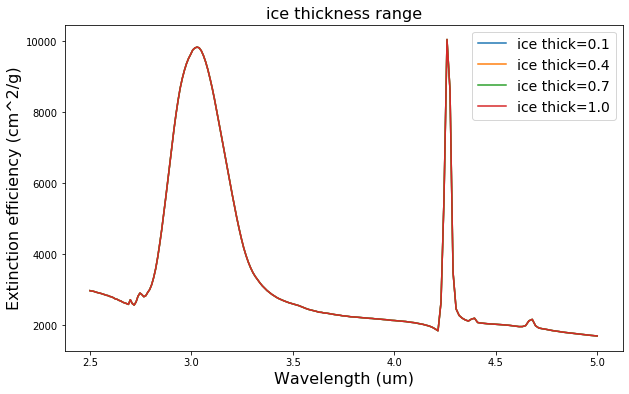

In [384]:
# graph ice thickness range

# choose amax and alpha to fix
# amax[0] = 0.011
# alpha[0] = -2.5
pars,ids = vary_icethick(29,9)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)

print("(amin, amax, alpha, ice thickness)")
for i in np.linspace(0,len(ids)-1,4,dtype=int):
    print(pars[i]["pars"])
    data_raw = fits.getdata('opacities/opacity_'+str(ids[i])+'.fits')
    ax1.plot(data_raw['wavelength'], data_raw['cext'],label="ice thick="+str(round(pars[i]["pars"][3],2)))

# all four plots are equal
#ax1.set_xlim(3,3.05)
#ax1.set_ylim(207100,207200)

ax1.set_title("ice thickness range",fontsize=16)
ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Extinction efficiency (cm^2/g)",fontsize=16)
ax1.legend(fontsize=14)

In [385]:
def plot_model(amax_ind,alpha_ind,ice_thick_ind):
    title = ("amax="+str(amax_ind),"alpha="+str(alpha_ind),"ice thick="+str(ice_thick_ind))
    if amax_ind == "vary":
        pars,ids = vary_amax(alpha_ind,ice_thick_ind)
        ind = 1
    elif alpha_ind == "vary":
        pars,ids = vary_alpha(amax_ind,ice_thick_ind)
        ind = 2
    elif ice_thick_ind == "vary":
        pars,ids = vary_icethick(amax_ind,alpha_ind)
        ind = 3
    else:
        print("inputs must include two constants and 'vary'")
    
    ids_subs = []
    labels = []
    cexts = {}
    params = {"labels":("amin", "amax", "alpha", "ice thickness")}
    for i in np.linspace(0,len(ids)-1,4,dtype=int):
        ids_subs.append(ids[i])
        data_raw = fits.getdata('opacities/opacity_'+str(ids[i])+'.fits')
        label = params["labels"][ind]+"="+str(round(pars[i]["pars"][ind],3))
        labels.append(str(label))
        waves = data_raw['wavelength']
        cexts[ids[i]] = data_raw['cext']
        params[ids[i]] = pars[i]["pars"]
    
 #   create_plot(title,ids_subs,labels,waves,cexts,params)
    return title,ids_subs,labels,waves,cexts,params

def create_plot(title,ids_subs,labels,waves,cexts,params):
    fig=plt.figure(1,figsize=(10,6))
    ax1=fig.add_subplot(111)
    for i in range(len(ids_subs)):
        ax1.plot(waves, cexts[ids_subs[i]],label=labels[i])
    ax1.set_title(title,fontsize=16)
    ax1.set_xlabel("Wavelength (um)",fontsize=16)
    ax1.set_ylabel("Extinction efficiency (cm^2/g)",fontsize=16)
    ax1.legend(fontsize=13)

def vary_amax(alpha_ind=0,ice_thick_ind=0): #input fixed alpha/ice thickness
    pars=[]
    ids = []
    for x in np.arange(0,30,1):
        id_ = (x*100)+(alpha_ind*10)+ice_thick_ind
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids

def vary_alpha(amax_ind=0,ice_thick_ind=0): #input fixed amax/ice thickness
    pars=[]
    ids = []
    for x in np.arange(0,10,1):
        id_ = (amax_ind*100)+(x*10)+ice_thick_ind
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids

def vary_icethick(amax_ind=0,alpha_ind=0): #input fixed amax/alpha
    pars=[]
    ids = []
    for x in np.arange(0,10,1):
        id_ = (amax_ind*100)+(alpha_ind*10)+x
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids


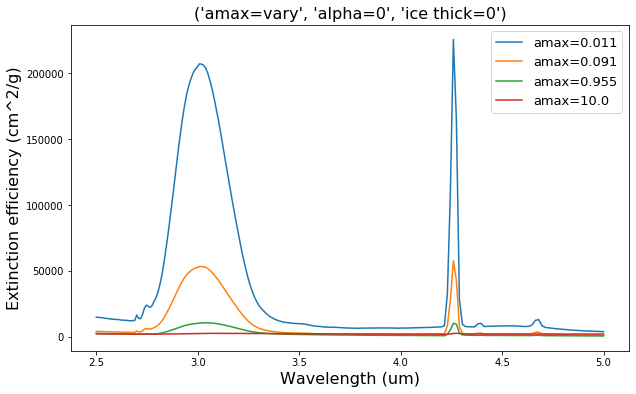

In [386]:
title,ids_subs,labels,waves,cexts,params = plot_model("vary",0,0)
create_plot(title,ids_subs,labels,waves,cexts,params)

In [387]:
# create subplot grid
# inputs = [("vary",0,0),("vary",3,0),("vary",6,0),("vary",9,0)]

def create_grid(inp):
    title0,ids0,labels0,x0,y0,params0 = plot_model(inp[0][0],inp[0][1],inp[0][2])
    title1,ids1,labels1,x1,y1,params1 = plot_model(inp[1][0],inp[1][1],inp[1][2])
    title2,ids2,labels2,x2,y2,params2 = plot_model(inp[2][0],inp[2][1],inp[2][2])
    title3,ids3,labels3,x3,y3,params3 = plot_model(inp[3][0],inp[3][1],inp[3][2])
    titles = (title0,title1,title2,title3)
    ids = (ids0,ids1,ids2,ids3)
    labels = (labels0,labels1,labels2,labels3)
    xs = (x0,x1,x2,x3)
    ys = (y0,y1,y2,y3)
    params = (params0,params1,params2,params3)

    fig=plt.figure(1,figsize=(15,10))
    axs = [ax0,ax1,ax2,ax3]
    for i in range(4):
        axs[i] = fig.add_subplot(2,2,i+1)
        idlist = ids[i]
        for i_vary in range(len(idlist)):
            axs[i].plot(xs[i], ys[i][idlist[i_vary]],label=labels[i][i_vary])
        axs[i].set(title=titles[i],xlabel="Wavelength (um)", 
                   ylabel="Extinction efficiency (cm^2/g)")
        axs[i].legend()


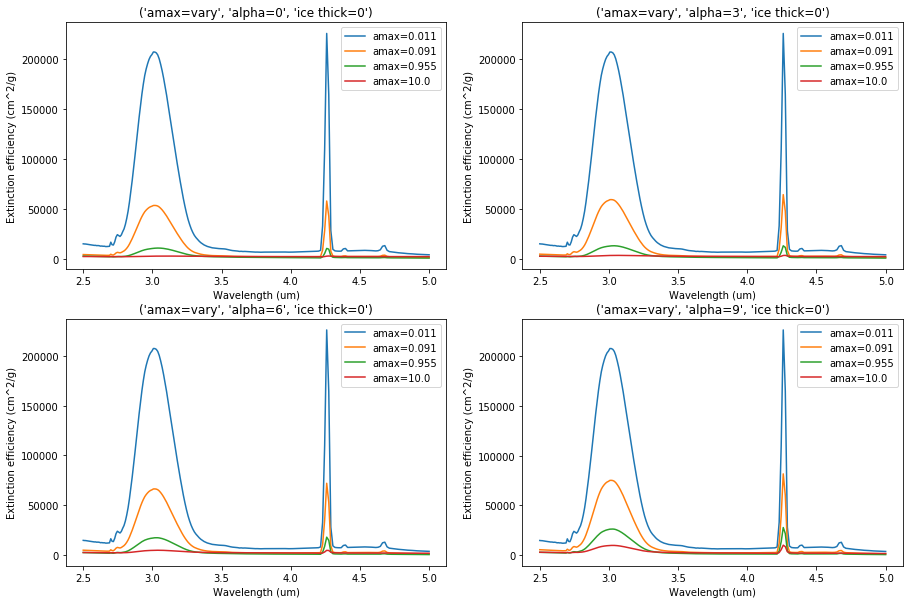

In [388]:
# vary amax, change alpha
create_grid([("vary",0,0),("vary",3,0),("vary",6,0),("vary",9,0)])

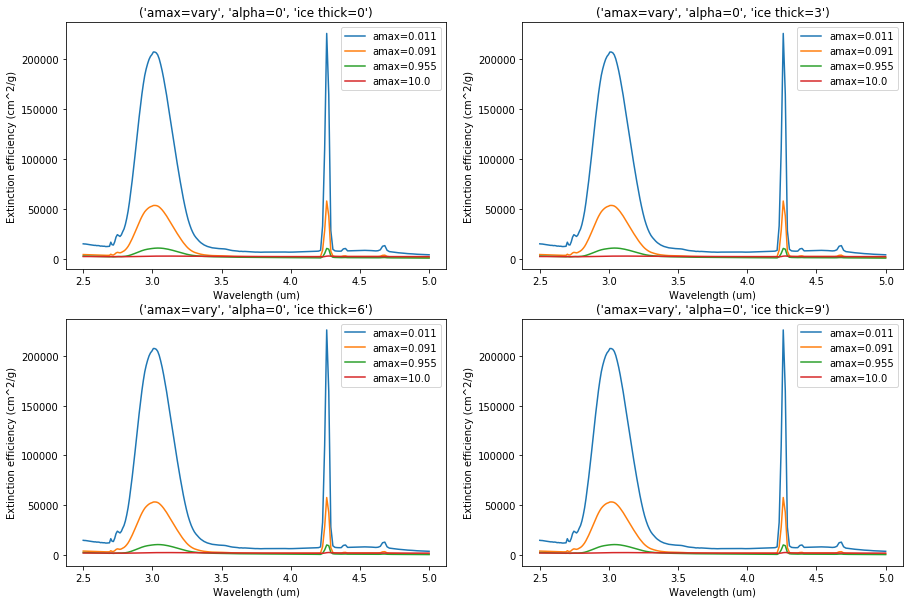

In [389]:
# vary amax, change thickness
create_grid([("vary",0,0),("vary",0,3),("vary",0,6),("vary",0,9)])

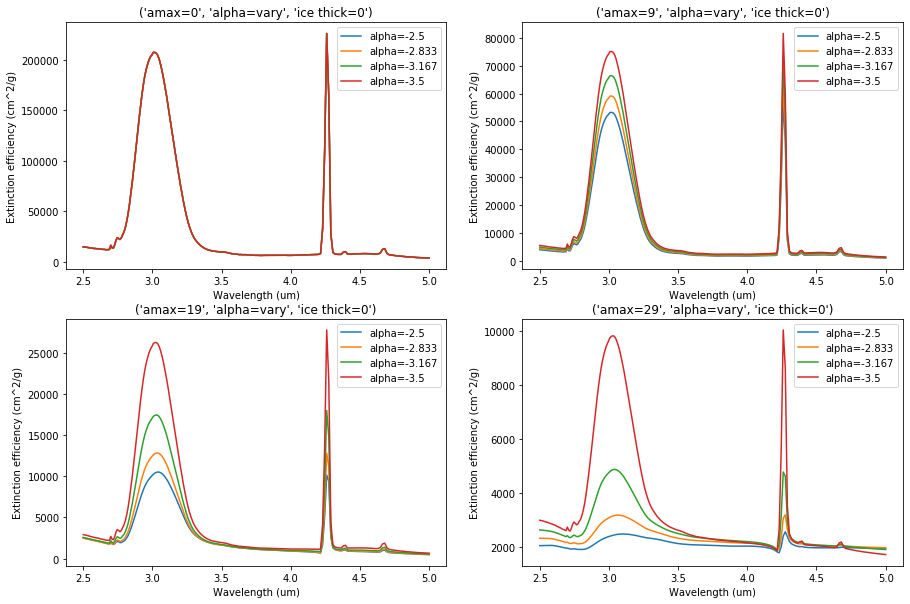

In [390]:
# vary alpha, change amax
create_grid([(0,"vary",0),(9,"vary",0),(19,"vary",0),(29,"vary",0)])

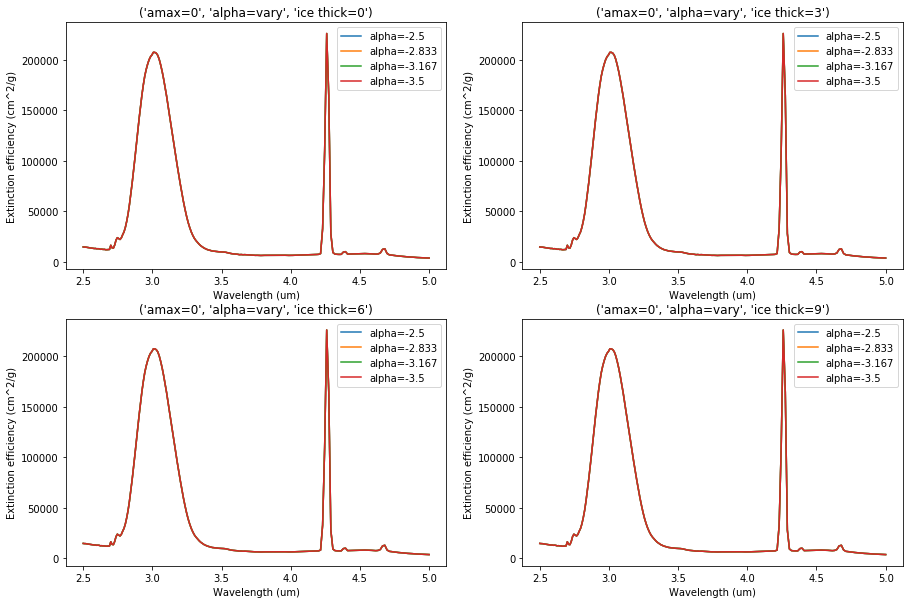

In [391]:
# vary alpha, change ice thickness
create_grid([(0,"vary",0),(0,"vary",3),(0,"vary",6),(0,"vary",9)])

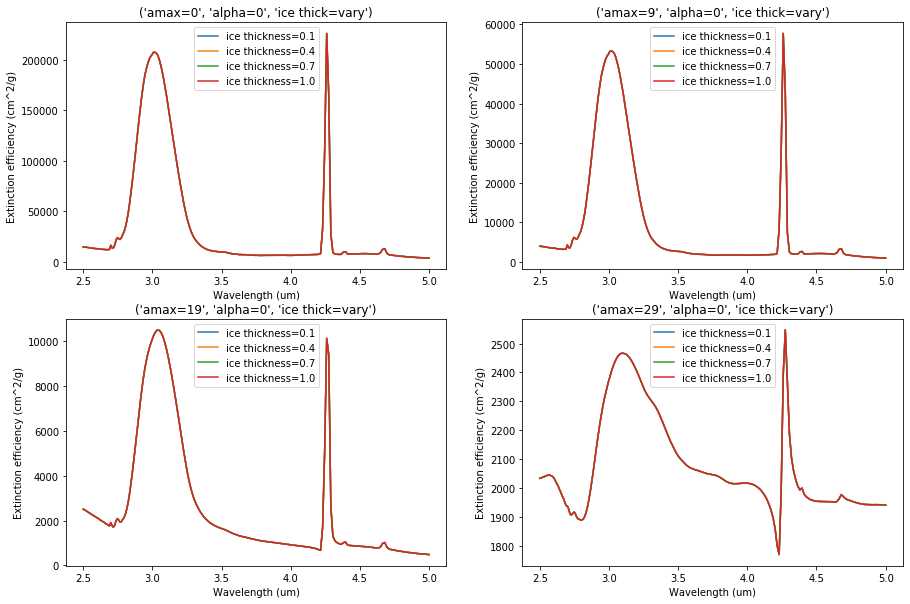

In [392]:
# vary ice thickness, change amax
create_grid([(0,0,"vary"),(9,0,"vary"),(19,0,"vary"),(29,0,"vary")])

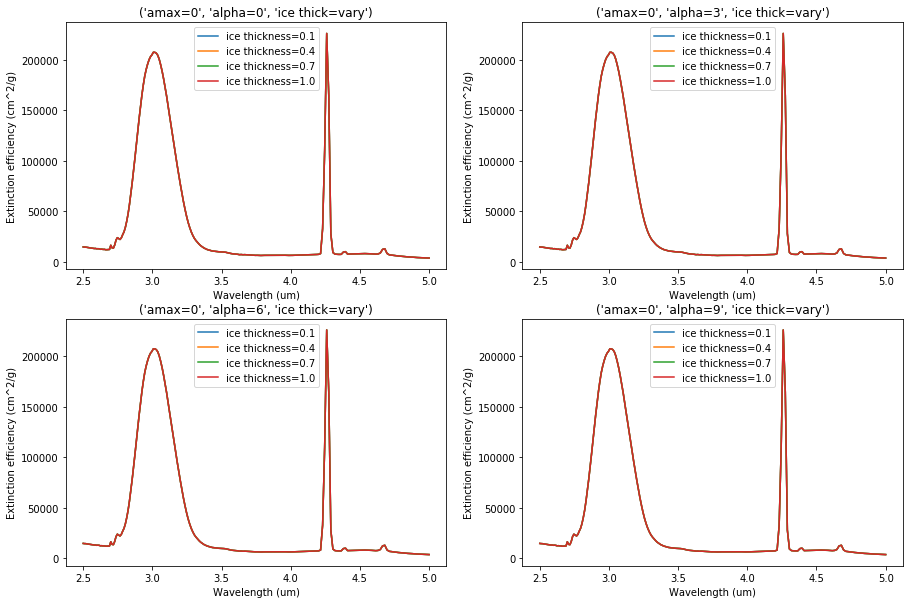

In [393]:
# vary ice thickness, change alpha
create_grid([(0,0,"vary"),(0,3,"vary"),(0,6,"vary"),(0,9,"vary")])